In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

In [2]:
# 전체 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="dataset/ratings.txt")

# 훈련/테스트 데이터 
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="dataset/ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="dataset/ratings_test.txt")

('dataset/ratings_test.txt', <http.client.HTTPMessage at 0x244839fcca0>)

In [58]:
train = pd.read_table('dataset/ratings_train.txt')
test = pd.read_table('dataset/ratings_test.txt')

# Train Dataset

In [59]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## Null 데이터 처리

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [61]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [62]:
train.dropna(inplace=True)
train.reset_index(inplace=True, drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149995 entries, 0 to 149994
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [63]:
train[train['document'].isnull()]

,id,document,label


## 중복 데이터 처리

In [64]:
# 모든 중복값 찾기
train[train['document'].duplicated(keep='first') == True]

,id,document,label
1058,5890638,4,0
1097,2062443,쵝오,1
1248,3502685,최고,1
1483,775332,최고,1
1707,8009134,재밌다,1
...,...,...,...
149914,6502490,짱,1
149944,3924716,OO 영화,0
149955,6368431,지루하다,0
149961,6735753,1,0


In [65]:
train.drop(train[train['document'].duplicated(keep='first') == True].index, inplace=True, axis=0)
train.reset_index(inplace=True, drop=True)

In [66]:
train[train['document'].duplicated(keep='first') == True]

,id,document,label


In [67]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
146177,6222902,인간이 문제지.. 소는 뭔죄인가..,0
146178,8549745,평점이 너무 낮아서...,1
146179,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
146180,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [68]:
train.groupby('label').count()

,id,document
label,,
0,73342,73342
1,72840,72840


## Data Imbalance (데이터 불균형 문제 설명)

In [69]:
# 한글 폰트 사용을 위해서 세팅
import matplotlib.font_manager as fm
# font_path = '/usr/share/fonts/AppleGothic.ttf' 
font_path = "C:/Windows/Fonts/malgun.ttf"
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

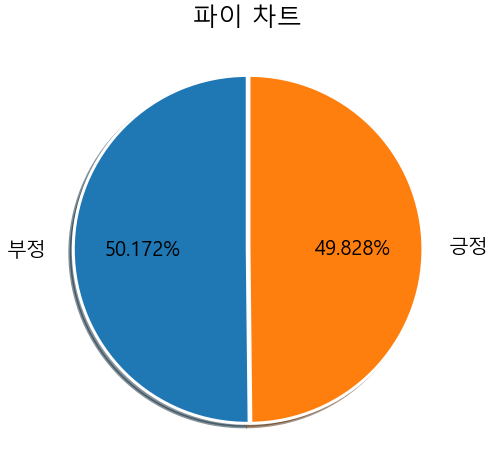

In [70]:
# 그래프 사이즈 조절
plt.figure(figsize=(8,8))

# 데이터 입력
names = ['부정','긍정']
values = train.groupby('label').count()['id']

# 파이 차트에 대한 설정 
plt.pie(values, 
        labels=names, 
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors= ['tab:blue','tab:orange'],
        autopct = "%0.3f%%",
        textprops = {"fontsize":20},
        startangle = 90,
        explode = [0,0.01],
        shadow = True
       )

# 타이틀 및 축 설정
plt.title('파이 차트', fontsize=25)

# 그래프 보여주기 
plt.show()

## OKT pos를 활용하여 조사/구두점/숫자 등을 제거하기

In [71]:
train['document'].loc[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [72]:
okt = Okt()
okt.morphs(train['document'].loc[0], stem = True)
# stem=True을 통해 어릴떄 -> 어리다 때 , 재밌어요 -> 재밌다 로 stemming이 어느정도 진행되줌)

['아', '더빙', '..', '진짜', '짜증나다', '목소리']

In [73]:
okt.pos(train['document'].loc[0], stem = True)

[('아', 'Exclamation'),
 ('더빙', 'Noun'),
 ('..', 'Punctuation'),
 ('진짜', 'Noun'),
 ('짜증나다', 'Adjective'),
 ('목소리', 'Noun')]

In [74]:
okt.pos(train['document'].loc[1], stem = True)

[('흠', 'Noun'),
 ('...', 'Punctuation'),
 ('포스터', 'Noun'),
 ('보고', 'Noun'),
 ('초딩', 'Noun'),
 ('영화', 'Noun'),
 ('줄', 'Noun'),
 ('....', 'Punctuation'),
 ('오버', 'Noun'),
 ('연기', 'Noun'),
 ('조차', 'Josa'),
 ('가볍다', 'Adjective'),
 ('않다', 'Verb')]

In [75]:
sentence = okt.pos(train['document'].loc[0], stem = True)
new_sentence = []
for word in sentence:
    if word[1] not in ['Josa','Punctuation','Number']:
        new_sentence.append(word[0])
print(' '.join(new_sentence))

아 더빙 진짜 짜증나다 목소리


In [76]:
new_document = []
for i in tqdm(range(len(train))):
    sentence = okt.pos(train['document'].loc[i], stem = True)
    new_sentence = []
    for word in sentence:
        if word[1] not in ['Josa','Punctuation','Number']:
            new_sentence.append(word[0])
    new_document.append(new_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 146182/146182 [20:48<00:00, 117.11it/s]


In [77]:
train['new_document'] = new_document
train

,id,document,label,new_document
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다, 않다]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 늙다,..."
...,...,...,...,...
146177,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간, 문제, 소, 뭔, 죄인]"
146178,8549745,평점이 너무 낮아서...,1,"[평점, 너무, 낮다]"
146179,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이, 뭐, 한국인, 거들다, 먹거리, 필리핀, 혼혈, 착하다]"
146180,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 들, 자화상]"


In [78]:
# train.to_csv("dataset/네이버영화리뷰.csv", encoding='utf-8-sig')

In [89]:
train = pd.read_csv("dataset/네이버영화리뷰.csv", index_col=0)
train['new_document'] = train['new_document'].apply(lambda x: x[1:-1].replace("'",'').replace(' ','').split(','))

In [90]:
train

,id,document,label,new_document
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다, 않다]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 늙다,..."
...,...,...,...,...
146177,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간, 문제, 소, 뭔, 죄인]"
146178,8549745,평점이 너무 낮아서...,1,"[평점, 너무, 낮다]"
146179,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이, 뭐, 한국인, 거들다, 먹거리, 필리핀, 혼혈, 착하다]"
146180,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 들, 자화상]"


In [91]:
train['new_document'].loc[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [92]:
total_word = []
for i in range(len(train)):
    for word in train['new_document'].loc[i]:
        total_word.append(word)

In [93]:
train.new_document.loc[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [94]:
import collections
collections.Counter(total_word).most_common(20)

[('영화', 50461),
 ('하다', 41068),
 ('보다', 38433),
 ('들', 18097),
 ('이', 17526),
 ('없다', 15568),
 ('있다', 12414),
 ('좋다', 11992),
 ('너무', 11106),
 ('정말', 9738),
 ('되다', 8839),
 ('재밌다', 8796),
 ('적', 8733),
 ('같다', 8337),
 ('진짜', 8317),
 ('이다', 8251),
 ('점', 7842),
 ('아니다', 7785),
 ('않다', 7714),
 ('만들다', 6493)]

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['new_document'])

In [96]:
print(tokenizer.word_index)

{'영화': 1, '하다': 2, '보다': 3, '들': 4, '이': 5, '없다': 6, '있다': 7, '좋다': 8, '너무': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '같다': 14, '진짜': 15, '이다': 16, '점': 17, '아니다': 18, '않다': 19, '만들다': 20, '연기': 21, '나오다': 22, '것': 23, '평점': 24, '내': 25, '최고': 26, '그': 27, '안': 28, '스토리': 29, '생각': 30, '못': 31, '다': 32, '왜': 33, '드라마': 34, '감동': 35, '사람': 36, '보고': 37, '이렇다': 38, '말': 39, '아깝다': 40, '더': 41, '때': 42, '배우': 43, 'ㅋㅋ': 44, '거': 45, '감독': 46, '그냥': 47, '재미있다': 48, '내용': 49, '재미': 50, '중': 51, '뭐': 52, '주다': 53, '한': 54, '좀': 55, '자다': 56, '지루하다': 57, '재미없다': 58, '시간': 59, '수': 60, '쓰레기': 61, '가다': 62, '모르다': 63, '들다': 64, '아': 65, '그렇다': 66, '싶다': 67, '나': 68, '작품': 69, '사랑': 70, '알다': 71, '하나': 72, '다시': 73, '마지막': 74, '볼': 75, '잘': 76, '이건': 77, '오다': 78, 'ㅋ': 79, '저': 80, '정도': 81, '완전': 82, 'ㅋㅋㅋ': 83, '많다': 84, '처음': 85, '장면': 86, '액션': 87, '주인공': 88, '차다': 89, '이렇게': 90, '걸': 91, '안되다': 92, '개': 93, '나다': 94, 'ㅠㅠ': 95, '지금': 96, '돈': 97, '최악': 98, '이야기': 99, '임': 100, '하': 101, '느낌'

In [97]:
print(tokenizer.word_counts)

OrderedDict([('아', 3110), ('더빙', 573), ('진짜', 8317), ('짜증나다', 1008), ('목소리', 374), ('흠', 259), ('포스터', 573), ('보고', 4637), ('초딩', 422), ('영화', 50461), ('줄', 1240), ('오버', 142), ('연기', 6432), ('가볍다', 361), ('않다', 7714), ('너', 686), ('무재', 69), ('밓었', 1), ('다그', 24), ('래서', 17), ('보다', 38433), ('추천', 1187), ('다', 5238), ('교도소', 16), ('이야기', 2171), ('구먼', 11), ('솔직하다', 1204), ('재미', 3888), ('없다', 15568), ('평점', 6275), ('조정', 40), ('사이', 219), ('몬페', 2), ('그', 5669), ('의', 774), ('익살스럽다', 9), ('돋보이다', 288), ('스파이더맨', 63), ('늙다', 197), ('보이다', 1071), ('하다', 41068), ('커스틴', 4), ('던스트', 2), ('너무나도', 206), ('이쁘다', 1033), ('막', 330), ('걸음', 20), ('마', 238), ('떼다', 151), ('세', 632), ('초등학교', 116), ('학년', 122), ('생인', 5), ('살다', 1169), ('ㅋㅋㅋ', 2459), ('별', 2010), ('반개', 211), ('아깝다', 4402), ('움', 1055), ('원작', 1252), ('긴장감', 830), ('제대로', 799), ('살리다', 533), ('욕', 790), ('나오다', 6397), ('이응경', 8), ('길용우', 4), ('연', 765), ('기', 1951), ('생활', 126), ('몇', 700), ('년', 388), ('정말', 9738), ('발', 322), (

In [98]:
# 전체 단어 개수
print(len(tokenizer.word_counts))

46147


In [99]:
threshold = 3
rare_cnt = 0
for i,j in tokenizer.word_counts.items():
    if j < threshold:
        rare_cnt +=1 

print(rare_cnt)

26562


In [100]:
print(len(tokenizer.word_counts)-rare_cnt)

19585


In [101]:
vocab_size = len(tokenizer.word_counts)-rare_cnt
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(train['new_document'])
X_train = tokenizer.texts_to_sequences(train['new_document'])

In [102]:
train['tokenized_document'] = X_train

In [103]:
index_list = []
for i in range(len(train)):
    if len(train['tokenized_document'].loc[i]) == 0:
        index_list.append(i)
train.loc[index_list]

In [104]:
train.loc[index_list]

,id,document,label,new_document,tokenized_document
28,6091784,재밋는뎅,1,[재밋는뎅],[]
416,5025054,말랑말랑 ...,0,[말랑말랑],[]
668,1600635,General,0,[General],[]
1156,3576721,목포.. 붹,0,"[목포, 붹]",[]
1298,7281167,씐나,1,[씐],[]
...,...,...,...,...,...
141465,5670502,우윀,0,[우윀],[]
141719,7303763,awg,0,[awg],[]
143383,7379098,ㅊㅊㅊㅊ,0,[ㅊㅊㅊㅊ],[]
144787,8588827,asdasdasdasd,0,[asdasdasdasd],[]


In [105]:
train.drop(index_list,inplace=True,axis=0)
train.reset_index(inplace=True, drop=True)
train

,id,document,label,new_document,tokenized_document
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]","[65, 427, 15, 240, 630]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다, 않다]","[868, 428, 37, 582, 1, 196, 1394, 21, 645, 19]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]","[347, 2367, 4955, 6208, 3, 203, 32]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]","[6421, 99, 8068, 199, 50, 6, 24, 3528]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 늙다,...","[993, 27, 309, 9097, 21, 792, 1, 2520, 1067, 2..."
...,...,...,...,...,...
145780,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간, 문제, 소, 뭔, 죄인]","[197, 432, 671, 264, 7295]"
145781,8549745,평점이 너무 낮아서...,1,"[평점, 너무, 낮다]","[24, 9, 184]"
145782,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이, 뭐, 한국인, 거들다, 먹거리, 필리핀, 혼혈, 착하다]","[5, 52, 1393, 5519, 14667, 10444, 10377, 1006]"
145783,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 들, 자화상]","[1001, 1, 2198, 2853, 1178, 521, 4, 7793]"


In [118]:
for i in range(len(train['tokenized_document'])):
    if len(train['tokenized_document'].loc[i]) > 31:
        print(i)

7
22
45
48
64
70
127
141
145
148
162
163
170
181
202
231
232
289
346
365
369
381
408
417
450
471
488
506
507
542
551
570
573
641
653
669
673
708
709
726
741
757
771
823
827
841
843
879
948
965
996
1012
1016
1068
1075
1098
1150
1152
1158
1192
1195
1202
1210
1241
1284
1313
1324
1333
1335
1355
1374
1383
1393
1423
1452
1461
1498
1599
1650
1658
1678
1682
1684
1695
1709
1744
1777
1789
1801
1808
1812
1822
1864
1875
1884
1898
1930
1964
1966
2014
2021
2042
2045
2058
2066
2080
2115
2118
2134
2136
2139
2200
2232
2254
2298
2330
2372
2393
2402
2407
2424
2440
2465
2492
2556
2651
2697
2735
2746
2749
2766
2771
2777
2802
2803
2809
2815
2826
2851
2861
2881
2882
2883
2917
2943
2966
3003
3024
3044
3056
3077
3093
3120
3123
3128
3157
3175
3189
3202
3234
3243
3251
3264
3284
3289
3302
3338
3370
3402
3406
3427
3451
3458
3464
3472
3558
3564
3575
3643
3644
3666
3689
3713
3745
3790
3854
3864
3867
3873
3883
3891
3916
3939
3961
3976
4014
4026
4034
4054
4067
4077
4108
4141
4166
4204
4237
4286
4306
4366
4377
4390
440

31936
31942
31983
31988
32006
32041
32061
32073
32079
32081
32083
32125
32133
32134
32136
32139
32185
32201
32211
32226
32241
32258
32259
32260
32265
32325
32335
32353
32372
32380
32400
32430
32448
32452
32482
32545
32549
32564
32615
32628
32641
32654
32708
32722
32781
32870
32894
32902
32959
32964
32985
32990
33004
33005
33017
33049
33061
33078
33091
33099
33167
33168
33187
33188
33194
33231
33251
33261
33302
33324
33376
33377
33386
33388
33389
33405
33431
33451
33467
33472
33528
33561
33603
33634
33644
33653
33669
33679
33687
33753
33774
33814
33819
33836
33839
33850
33860
33869
33870
33894
33928
33933
33934
33952
33978
33981
33988
33989
34089
34111
34118
34139
34166
34188
34203
34212
34219
34220
34230
34231
34274
34308
34312
34321
34329
34338
34341
34344
34363
34369
34379
34397
34462
34498
34547
34611
34643
34719
34761
34765
34766
34794
34816
34890
34914
34940
34959
34979
34982
34988
35011
35079
35085
35095
35103
35132
35139
35173
35229
35231
35248
35250
35267
35290
35296
35319
3532

65654
65684
65712
65731
65740
65744
65774
65787
65801
65820
65834
65848
65855
65881
65937
65941
65967
66009
66012
66022
66061
66139
66142
66159
66165
66172
66202
66212
66225
66252
66306
66317
66383
66386
66390
66401
66452
66461
66496
66505
66526
66558
66582
66615
66616
66618
66624
66651
66665
66680
66689
66708
66712
66736
66755
66779
66786
66816
66884
66893
66913
66994
66997
67001
67004
67016
67027
67033
67041
67134
67145
67148
67159
67165
67180
67184
67203
67232
67268
67270
67275
67313
67340
67346
67348
67352
67358
67402
67461
67515
67548
67577
67595
67603
67631
67655
67682
67687
67755
67771
67779
67792
67897
67928
67952
67957
68009
68012
68046
68059
68071
68072
68147
68172
68182
68184
68237
68245
68246
68311
68366
68376
68382
68400
68443
68501
68510
68524
68527
68528
68539
68540
68552
68593
68648
68673
68676
68716
68722
68734
68735
68768
68789
68810
68827
68851
68861
68870
68908
68911
68915
68954
68958
68992
69016
69037
69050
69083
69091
69131
69134
69137
69159
69174
69184
69200
6920

97223
97230
97260
97290
97302
97309
97349
97364
97366
97391
97394
97440
97441
97500
97510
97575
97576
97579
97585
97606
97615
97624
97634
97658
97664
97680
97699
97715
97725
97734
97753
97837
97948
97954
98022
98023
98028
98037
98079
98097
98124
98137
98163
98188
98190
98208
98219
98282
98287
98288
98347
98348
98370
98372
98374
98382
98417
98463
98488
98507
98512
98514
98561
98568
98574
98588
98602
98631
98643
98666
98690
98692
98735
98742
98758
98776
98839
98842
98847
98857
98878
98887
98902
98903
98949
98982
98990
99002
99051
99054
99105
99132
99145
99183
99187
99210
99241
99249
99254
99256
99263
99266
99277
99342
99353
99354
99357
99364
99368
99431
99439
99456
99482
99492
99496
99499
99500
99502
99510
99607
99615
99675
99699
99701
99712
99731
99797
99838
99845
99853
99877
99886
99909
99924
99944
99963
99989
99990
100015
100022
100059
100096
100100
100145
100193
100200
100273
100280
100322
100326
100358
100366
100376
100389
100405
100429
100454
100512
100540
100562
100577
100595
1006

121737
121746
121749
121758
121859
121862
121915
121926
121935
121962
121979
122010
122027
122084
122110
122114
122125
122140
122162
122168
122175
122180
122207
122218
122224
122265
122286
122314
122342
122404
122472
122480
122525
122579
122604
122636
122671
122696
122697
122738
122763
122825
122839
122858
122880
122924
122945
122960
122965
122991
123018
123023
123052
123068
123098
123104
123121
123139
123150
123187
123219
123232
123257
123282
123293
123314
123329
123355
123370
123378
123428
123505
123538
123555
123558
123568
123591
123622
123645
123694
123732
123816
123837
123851
123864
123886
123904
123917
123922
123943
123957
123961
123968
123981
124031
124100
124120
124128
124144
124148
124166
124250
124270
124351
124359
124384
124392
124397
124411
124433
124447
124450
124499
124506
124522
124532
124550
124561
124574
124579
124598
124678
124681
124724
124730
124736
124755
124759
124781
124787
124802
124818
124826
124858
124860
124868
124886
124898
124916
124927
124962
124992
124996

리뷰의 최대 길이 : 67
리뷰의 평균 길이 : 10.458565696059265


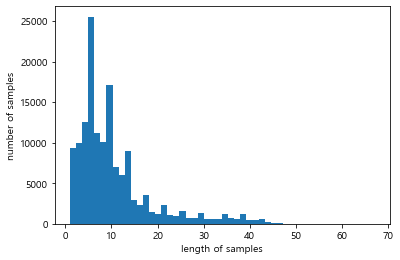

In [110]:
X_train = train['tokenized_document']
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=30)

In [117]:
X_train[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       6421,   99, 8068,  199,   50,    6,   24, 3528])

In [120]:
train['document'].loc[7]

'별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네'

In [121]:
train['new_document'].loc[7]

['별',
 '반개',
 '아깝다',
 '욕',
 '나오다',
 '이응경',
 '길용우',
 '연',
 '기',
 '생활',
 '몇',
 '년',
 '정말',
 '발',
 '해도',
 '그것',
 '낫다',
 '납치',
 '감금',
 '반복',
 '반복',
 '이',
 '드라마',
 '가족',
 '없다',
 '연기',
 '못',
 '하다',
 '사람',
 '모',
 '엿',
 '네']

In [122]:
train['tokenized_document'].loc[7]

[111,
 1020,
 40,
 305,
 22,
 9753,
 14265,
 313,
 115,
 1533,
 340,
 615,
 10,
 710,
 558,
 552,
 451,
 3045,
 8069,
 1333,
 1333,
 5,
 34,
 258,
 6,
 21,
 31,
 2,
 36,
 664,
 1039,
 121]

In [123]:
X_train[7]

array([   40,   305,    22,  9753, 14265,   313,   115,  1533,   340,
         615,    10,   710,   558,   552,   451,  3045,  8069,  1333,
        1333,     5,    34,   258,     6,    21,    31,     2,    36,
         664,  1039,   121])

In [125]:
y_train = train['label']

In [126]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1823/1823 [==============================] - 181s 95ms/step - loss: 0.3902 - acc: 0.8233 - val_loss: 0.3622 - val_acc: 0.8409

Epoch 00001: val_acc improved from -inf to 0.84093, saving model to best_model.h5
Epoch 2/15
1823/1823 [==============================] - 167s 92ms/step - loss: 0.3285 - acc: 0.8575 - val_loss: 0.3360 - val_acc: 0.8542

Epoch 00002: val_acc improved from 0.84093 to 0.85417, saving model to best_model.h5
Epoch 3/15
1823/1823 [==============================] - 172s 95ms/step - loss: 0.3030 - acc: 0.8715 - val_loss: 0.3349 - val_acc: 0.8563

Epoch 00003: val_acc improved from 0.85417 to 0.85633, saving model to best_model.h5
Epoch 4/15
1823/1823 [==============================] - 169s 92ms/step - loss: 0.2833 - acc: 0.8826 - val_loss: 0.3277 - val_acc: 0.8590

Epoch 00004: val_acc improved from 0.85633 to 0.85900, saving model to best_model.h5
Epoch 5/15
1823/1823 [==============================] - 167s 92ms/step - loss: 0.2663 - acc: 0.8909 - val_loss:

In [ ]:
# verbose 학습 진행상황 프린트

# 배치 높을 수록: 메모리 소모가 크고 학습 시간이 오래 걸림
# 배치가 낮다면: 업데이트가 너무 자주 발생하여 훈련이 제대로 이뤄지지 않음 
# 컴퓨터가 계산하기 좋은 숫자 설정 

In [127]:
loaded_model = load_model('best_model.h5')

In [128]:
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [129]:
test.dropna(inplace=True)
test.reset_index(inplace=True, drop=True)
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49992,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49993,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49994,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49995,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [130]:
test.drop(test[test['document'].duplicated(keep='first') == True].index, inplace=True, axis=0)
test.reset_index(inplace=True, drop=True)
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49154,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [131]:
new_document = []
for i in tqdm(range(len(test))):
    sentence = okt.pos(test['document'].loc[i], stem = True)
    new_sentence = []
    for word in sentence:
        if word[1] not in ['Josa','Punctuation','Number']:
            new_sentence.append(word[0])
    new_document.append(new_sentence)
test['new_document'] = new_document

100%|███████████████████████████████████████████████████████████████████████████| 49157/49157 [04:02<00:00, 202.70it/s]


In [137]:
# test.to_csv("dataset/네이버영화리뷰테스트.csv", encoding='utf-8-sig')

In [138]:
test = pd.read_csv("dataset/네이버영화리뷰테스트.csv", index_col=0)
test['new_document'] = test['new_document'].apply(lambda x: x[1:-1].replace("'",'').replace(' ','').split(','))

In [139]:
X_test = tokenizer.texts_to_sequences(test['new_document'])
test['tokenized_document'] = X_test
test

In [141]:
index_list = []
for i in range(len(test)):
    if len(test['tokenized_document'].loc[i]) == 0:
        index_list.append(i)
test.drop(index_list,inplace=True,axis=0)
test.reset_index(inplace=True, drop=True)
test

,id,document,label,new_document,tokenized_document
0,6270596,굳 ㅋ,1,"[굳다, ㅋ]","[699, 79]"
1,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,"[뭐, 이, 평점, 들, 나쁘다, 않다, 점, 짜다, 리, 더, 더욱, 아니다]","[52, 5, 24, 4, 407, 19, 17, 293, 828, 41, 742,..."
2,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,"[지루하다, 않다, 완전, 막장, 임, 돈, 주다, 보기]","[57, 19, 82, 312, 100, 97, 53, 138]"
3,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,"[D, 만, 아니다, 별, 다섯, 개, 주다, 왜, D, 로, 나오다, 제, 심기,...","[811, 119, 18, 111, 2158, 93, 53, 33, 811, 356..."
4,7898805,"음악이 주가 된, 최고의 음악영화",1,"[음악, 주가, 되다, 최고, 음악, 영화]","[188, 2841, 11, 26, 188, 1]"
...,...,...,...,...,...
49002,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,"[오랜, 만, 평점, 로, 기다, 하다, ㅋㅋ, 킹왕짱, 쌈뽕, 영화, 만나다, 강...","[314, 119, 24, 356, 395, 2, 44, 6112, 1, 596, ..."
49003,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,"[의지, 박약, 들, 하다, 탈영, 일단, 주인공, 김대희, 닮다, 이등병, 찌다,...","[2121, 4, 2, 13602, 724, 88, 6413, 1326, 12942..."
49004,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,"[그림, 좋다, 완성, 도도, 높다, 보다, 내내, 불안하다, 만들다]","[940, 8, 760, 5862, 189, 3, 260, 3252, 20]"
49005,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,"[절대, 보다, 서다, 안, 되다, 영화, 재미, 없다, 기분, 잡, 하다, 세트,...","[332, 3, 448, 28, 11, 1, 50, 6, 271, 2137, 2, ..."


In [143]:
X_test = pad_sequences(test['tokenized_document'], maxlen=30)

In [144]:
X_test

array([[   0,    0,    0, ...,    0,  699,   79],
       [   0,    0,    0, ...,   41,  742,   18],
       [   0,    0,    0, ...,   97,   53,  138],
       ...,
       [   0,    0,    0, ...,  260, 3252,   20],
       [   0,    0,    0, ...,  632,   32, 7712],
       [   0,    0,    0, ...,  879,  125,   33]])

In [145]:
y_test = test['label']

In [146]:
loaded_model.evaluate(X_test, y_test)

1532/1532 [==============================] - 9s 6ms/step - loss: 0.3351 - acc: 0.8554


[0.3351045250892639, 0.8553676009178162]

In [150]:
new_sentence = '영화 너무 재밌다'
new_sentence = okt.morphs(new_sentence, stem=True)
encoded = tokenizer.texts_to_sequences([new_sentence])
pad_new = pad_sequences(encoded, maxlen = 30)
loaded_model.predict(pad_new)

array([[0.96833104]], dtype=float32)

In [151]:
new_sentence = '영화 너무 재미없다'
new_sentence = okt.morphs(new_sentence, stem=True)
encoded = tokenizer.texts_to_sequences([new_sentence])
pad_new = pad_sequences(encoded, maxlen = 30)
loaded_model.predict(pad_new)

array([[0.00822157]], dtype=float32)

In [153]:
float(loaded_model.predict(pad_new))

0.008221566677093506

In [173]:
def review(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True)
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = 30)
    pred = float(loaded_model.predict(pad_new))
    if pred > 0.5:
        print(f'{pred*100} 확률로 긍정리뷰 입니다.')
    else:
        print(f'{(1-pred)*100} 확률로 부정리뷰 입니다.')

In [185]:
review('그냥그래')

72.9662299156189 확률로 부정리뷰 입니다.
